In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
companies = pd.read_csv("./companies.csv",encoding= 'ansi')

In [3]:
rounds2 = pd.read_csv("./rounds2.csv",encoding= 'ansi')

In [4]:
mapping = pd.read_csv("./mapping.csv",encoding= 'ansi')

#### Table 1.1: Q1-How many unique companies are present in rounds2?
#### Answer: 66368

In [5]:
rounds2.nunique(axis=0)

company_permalink           90247
funding_round_permalink    114949
funding_round_type             14
funding_round_code              8
funded_at                    5033
raised_amount_usd           22095
dtype: int64

In [6]:
rounds2['company_permalink'].str.lower().nunique()

66368

#### Table 1.1: Q2-How many unique companies are present in the companies file?
#### Answer: 66368

In [7]:
companies.nunique(axis=0)

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

In [8]:
companies['permalink'].str.lower().nunique()

66368

#### Table 1.1: Q3-In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
#### Answer: permalink

In [9]:
companies.nunique(axis=0)

permalink        66368
name             66099
homepage_url     61191
category_list    27296
status               4
country_code       137
state_code         311
region            1092
city              5111
founded_at        3978
dtype: int64

#### Table 1.1: Q4-Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.
#### Answer: N

In [10]:
companies = companies.rename(columns={'permalink' : 'company_permalink'})

In [11]:
companies.company_permalink = companies.company_permalink.str.lower()

In [12]:
rounds2.company_permalink = rounds2.company_permalink.str.lower()

In [13]:
rounds2[~(rounds2.company_permalink.isin(companies.company_permalink.values))]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


Clealy the above DF is empty which means that there are no companies in round2 file which are present in comapnies.

#### Table 1.1: Q5-Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?
#### Answer: 114949

In [14]:
master = pd.merge(rounds2, companies, on='company_permalink', how='left')

In [15]:
master.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [16]:
master.shape

(114949, 15)

## Funding Type Analysis

In [17]:
master_fund_type = master[master['funding_round_type'].isin(['seed','angel','venture','private_equity'])].groupby('funding_round_type')

In [18]:
master_fund_type['raised_amount_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
funding_round_type,,,,,,,,
angel,4860.0,9.586945e+05,7.404397e+06,0.0,150000.00,400000.0,1000000.0,4.945120e+08
private_equity,1936.0,7.330859e+07,1.981135e+08,0.0,5000000.00,20000000.0,75000000.0,4.745460e+09
seed,23603.0,7.198180e+05,2.221733e+06,0.0,55000.00,275000.0,1000000.0,2.000000e+08
venture,50228.0,1.174895e+07,8.635207e+07,0.0,1600901.75,5000000.0,12000000.0,1.760000e+10


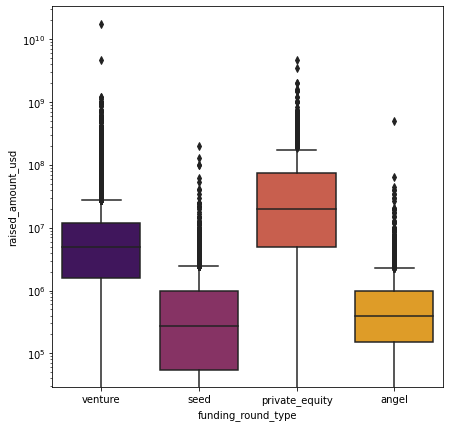

In [19]:
master_fund = master[master['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
plt.figure(figsize=(7, 7))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=master_fund, palette = "inferno",)
plt.yscale('log')
plt.show()

#### Clearly there are many outliers in above figure, hence median will be the more representative of the funding types

#### Table 2.1 Q1-Q4 Representative funding amount of venture/angel/seed/private equity types

In [20]:
master_fund_type['raised_amount_usd'].median()

funding_round_type
angel               400000.0
private_equity    20000000.0
seed                275000.0
venture            5000000.0
Name: raised_amount_usd, dtype: float64

#### Table 2.1 Q5 Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?
#### Answer: From the above median numbers, Venture funding type is in the range of 5-15 million, and hence this is the most suitable investment type.

## Country Analysis

#### Table 3.1 Analysing the Top 3 English-Speaking Countries

In [21]:
master_venture = master[master['funding_round_type'].isin(['venture'])]

In [22]:
master_venture_cntry = master_venture.groupby('country_code')

In [23]:
top_venture_cntry = master_venture_cntry['raised_amount_usd'].sum().sort_values(ascending=False)

In [24]:
top9 = top_venture_cntry[:9]

In [25]:
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [26]:
english_speaking_countries = ['USA', 'GBR', 'IND','CAN', 'AUS' ]

In [27]:
top3 = top9[top9.index.isin(english_speaking_countries)].head(3)

In [28]:
top3

country_code
USA    4.225108e+11
GBR    2.024563e+10
IND    1.439186e+10
Name: raised_amount_usd, dtype: float64

#### From https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language , we can see that USA, GBR and IND are among the English speaking countries while CHN is not. 
#### Answer: 
#### Top English speaking country - USA
#### Second English speaking country - GBR
#### Third English speaking country - IND

## Sector Analysis 1

### Extract the primary sector of each category list from the category_list column

In [29]:
master['category_list'] = master['category_list'].astype('str')

In [30]:
master['primary_sector'] = master['category_list'].apply(lambda x:x.split('|')[0].title())

#### Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [31]:
mapping = mapping[pd.notnull(mapping['category_list'])]

In [32]:
def replacing_zero_with_na(x) :
    i = x.find('0')    
    if i!= 0 :            # This replaces the entries having 0 with 'na' in string except beginning
        if x[i-1]!='.' :  # This eliminates entries with 1.0,2.0 at the end
            x = x.replace('0','na')
    elif i== 0 :             # This replaces the entries having '0' with 'na' at the beginning of the string    
            x = x.replace('0','na')

    return x.title()

In [33]:
mapping.category_list = mapping.category_list.apply(lambda x: replacing_zero_with_na(x))

While we can use pd.melt function to get the main sector, but I used this simple function which works on axis=1 and fetches us the desired result.

In [34]:
mapping['main_sector'] = mapping.apply(lambda x: x[x == 1].index.values[0], axis=1)

In [35]:
mapping = mapping.rename(columns={'category_list' : 'primary_sector'})

In [36]:
mapping_sub = mapping[['primary_sector','main_sector']]

In [37]:
master = pd.merge(master, mapping_sub, on='primary_sector', how='inner')

In [38]:
master = master[~(master.main_sector.isnull())]

## Sector Analysis 2

In [39]:
D1 = master[(master['country_code'] == 'USA') & (master['funding_round_type'] == 'venture') & (master['raised_amount_usd'] <= 15000000) & (master['raised_amount_usd'] >= 5000000)]

In [40]:
D2 = master[(master['country_code'] == 'GBR') & (master['funding_round_type'] == 'venture') & (master['raised_amount_usd'] <= 15000000) & (master['raised_amount_usd'] >= 5000000)]

In [41]:
D3 = master[(master['country_code'] == 'IND') & (master['funding_round_type'] == 'venture') & (master['raised_amount_usd'] <= 15000000) & (master['raised_amount_usd'] >= 5000000)]

### Table 5.1 Q1 - Total number of Investments (count)

Total number of Investments in USA

In [42]:
D1['raised_amount_usd'].count().sum()

12063

Total number of Investments in GBR

In [43]:
D2['raised_amount_usd'].count().sum()

621

Total number of Investments in IND

In [44]:
D3['raised_amount_usd'].count().sum()

328

#### Table 5.1 Q2 - Total amount of Investment (USD)

Total amount of Investments in USA

In [45]:
D1.raised_amount_usd.sum()

107757097294.0

Total amount of Investments in GBR

In [46]:
D2.raised_amount_usd.sum()

5379078691.0

Total amount of Investments in IND

In [47]:
D3.raised_amount_usd.sum()

2949543602.0

### Table 5.1 Q3-Q8 - Column C1

Top 3 sectors based on number of investments in USA. You can find the number of investments and sum invested in each of the 3 sectors for USA

In [48]:
D1_sec_grp = D1.groupby('main_sector')
print(D1_sec_grp['raised_amount_usd'].count().sort_values(ascending=False).head(3))
print(D1_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
Name: raised_amount_usd, dtype: int64
main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
Name: raised_amount_usd, dtype: float64


### Table 5.1 Q3-Q8 - Column C2

Top 3 sectors based on number of investments in GBR. You can find the number of investments and sum invested in each of the 3 sectors for GBR

In [49]:
D2_sec_grp = D2.groupby('main_sector')
print(D2_sec_grp['raised_amount_usd'].count().sort_values(ascending=False).head(3))
print(D2_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
Name: raised_amount_usd, dtype: int64
main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
Name: raised_amount_usd, dtype: float64


### Table 5.1 Q3-Q8 - Column C3

Top 3 sectors based on number of investments in IND. You can find the number of investments and sum invested in each of the 3 sectors for IND

In [50]:
D3_sec_grp = D3.groupby('main_sector')
print(D3_sec_grp['raised_amount_usd'].count().sort_values(ascending=False).head(3))
print(D3_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).head(3))

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Name: raised_amount_usd, dtype: int64
main_sector
Others                                     1.013410e+09
Social, Finance, Analytics, Advertising    5.505496e+08
News, Search and Messaging                 4.338345e+08
Name: raised_amount_usd, dtype: float64


### Table 5.1 Q9 - Column C1

Companies which received the highest investment in Top most sector in USA

In [51]:
D1_cmpy_sect1_grp = D1[D1.main_sector == 'Others'].groupby('name')
D1_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Virtustream          64300000.0
Capella Photonics    54968051.0
AirTight Networks    54201907.0
Name: raised_amount_usd, dtype: float64

### Table 5.1 Q9 - Column C2

Companies which received the highest investment in Top most sector in GBR

In [52]:
D2_cmpy_sect1_grp = D2[D2.main_sector == 'Others'].groupby('name')
D2_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Electric Cloud    37000000.0
SenSage           36250000.0
Enigmatec         32500000.0
Name: raised_amount_usd, dtype: float64

### Table 5.1 Q9 - Column C3

Companies which received the highest investment in Top most sector in IND

In [53]:
D3_cmpy_sect1_grp = D3[D3.main_sector == 'Others'].groupby('name')
D3_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
FirstCry.com    39000000.0
Myntra          38000000.0
CommonFloor     32900000.0
Name: raised_amount_usd, dtype: float64

### Table 5.1 Q10 - Column C1

Companies which received the highest investment in second best sector in USA

In [54]:
D1_cmpy_sect2_grp = D1[D1.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')
D1_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Demandbase                         63000000.0
Intacct                            61800000.0
Name: raised_amount_usd, dtype: float64

### Table 5.1 Q10 - Column C2

Companies which received the highest investment in second best sector in GBR

In [55]:
D2_cmpy_sect2_grp = D2[D2.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')
D2_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Celltick Technologies    37500000.0
myThings                 34000000.0
Zopa                     32900000.0
Name: raised_amount_usd, dtype: float64

### Table 5.1 Q10 - Column C3

Companies which received the highest investment in second best sector in IND

In [56]:
D3_cmpy_sect2_grp = D3[D3.main_sector == 'Social, Finance, Analytics, Advertising'].groupby('name')
D3_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(3)

name
Manthan Systems    50700000.0
Komli Media        28000000.0
ShopClues.com      25000000.0
Name: raised_amount_usd, dtype: float64

## Plots

### Funding Type Analysis

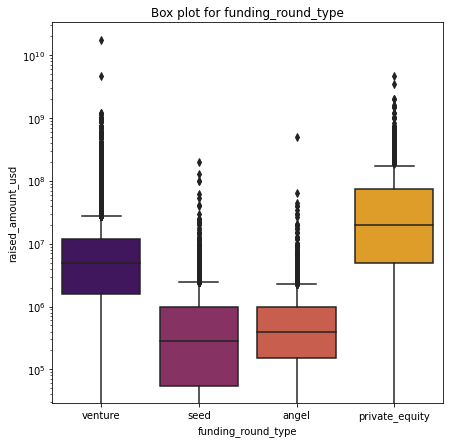

In [57]:
master_fund = master[master['funding_round_type'].isin(['seed','angel','venture','private_equity'])]
plt.figure(figsize=(7, 7))
sns.boxplot(x='funding_round_type', y='raised_amount_usd',data=master_fund, palette = "inferno",)
plt.yscale('log')
plt.title("Box plot for funding_round_type")
plt.show()

In [58]:
master_fund_type['raised_amount_usd'].sum()

funding_round_type
angel             4.659255e+09
private_equity    1.419254e+11
seed              1.698986e+10
venture           5.901262e+11
Name: raised_amount_usd, dtype: float64

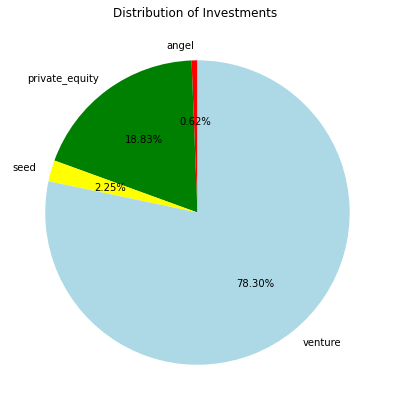

In [59]:
plt.figure(figsize=(7, 7))
plt.title('Distribution of Investments ')
# Data to plot
labels = 'angel', 'private_equity','seed', 'venture'
colors = ['red', 'green', 'yellow', 'lightblue']
# Plot
plt.pie(master_fund_type['raised_amount_usd'].sum(), labels=labels, colors=colors,autopct='%1.2f%%', startangle=90)
plt.show()

In [60]:
master_fund_type['raised_amount_usd'].mean().index

Index(['angel', 'private_equity', 'seed', 'venture'], dtype='object', name='funding_round_type')

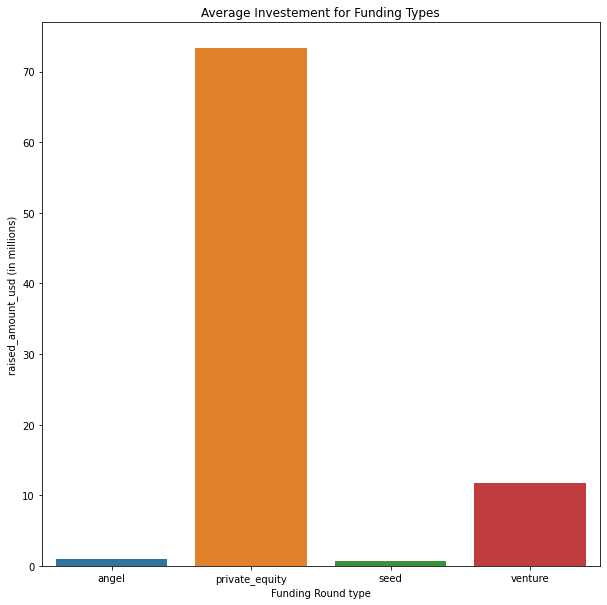

In [61]:
plt.figure(figsize=(10, 10))
sns.barplot(x=master_fund_type['raised_amount_usd'].mean().index.values,y=master_fund_type['raised_amount_usd'].mean()/1000000,ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.xlabel("Funding Round type")
plt.title("Average Investement for Funding Types") 
plt.show()

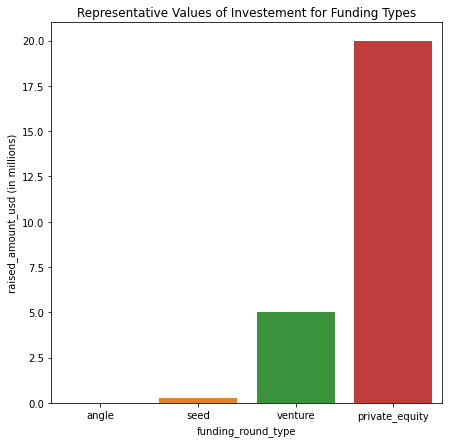

In [62]:
plt.figure(figsize=(7, 7))
sns.barplot(x=master['funding_round_type'],y=master['raised_amount_usd']/1000000,estimator=np.median,order=["angle","seed","venture","private_equity"],ci=None)
plt.ylabel("raised_amount_usd (in millions)")
plt.title("Representative Values of Investement for Funding Types") 
plt.show()

### Country Analysis

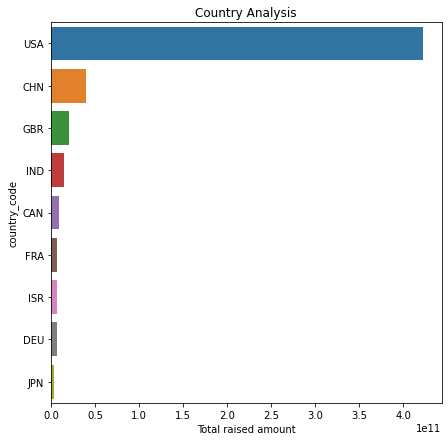

In [63]:
plt.figure(figsize=(7, 7))
sns.barplot(x= top9.values,y=top9.index)
plt.xlabel('Total raised amount')
plt.title('Country Analysis')
plt.show()

In [64]:
master_vent_cntry_count = master_venture_cntry['raised_amount_usd'].count().sort_values(ascending=False).head(9)

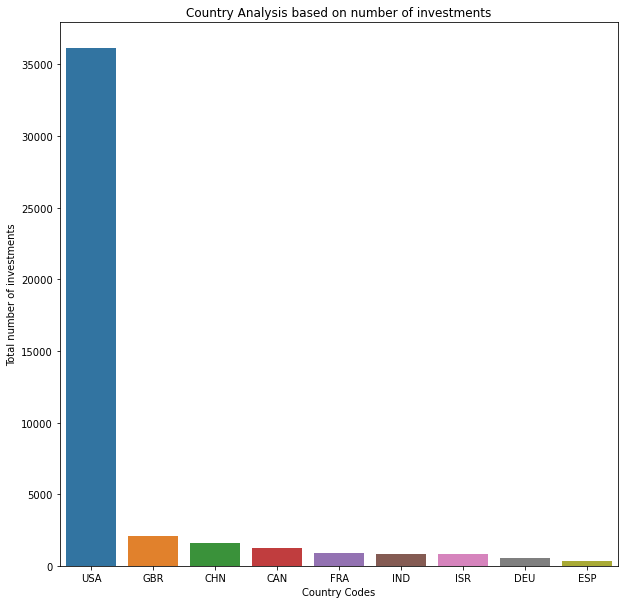

In [65]:
plt.figure(figsize=(10,10))
sns.barplot(y= master_vent_cntry_count.values,x=master_vent_cntry_count.index)
plt.ylabel('Total number of investments')
plt.xlabel('Country Codes')
plt.title('Country Analysis based on number of investments')
plt.show()

### Sector Analysis for USA

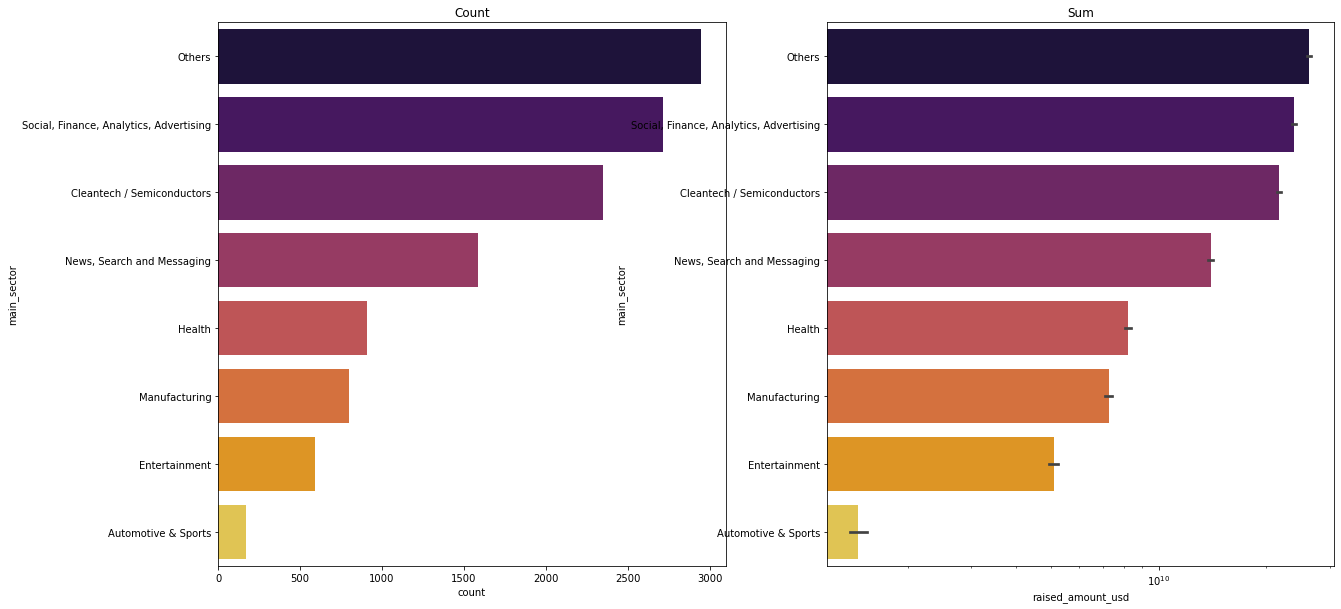

In [66]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", palette = "inferno",data=D1, order = D1['main_sector'].value_counts().index)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", palette = "inferno",data=D1, estimator=sum, order = D1_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).index)
plt.title("Sum")
plt.xscale('log')
plt.show()

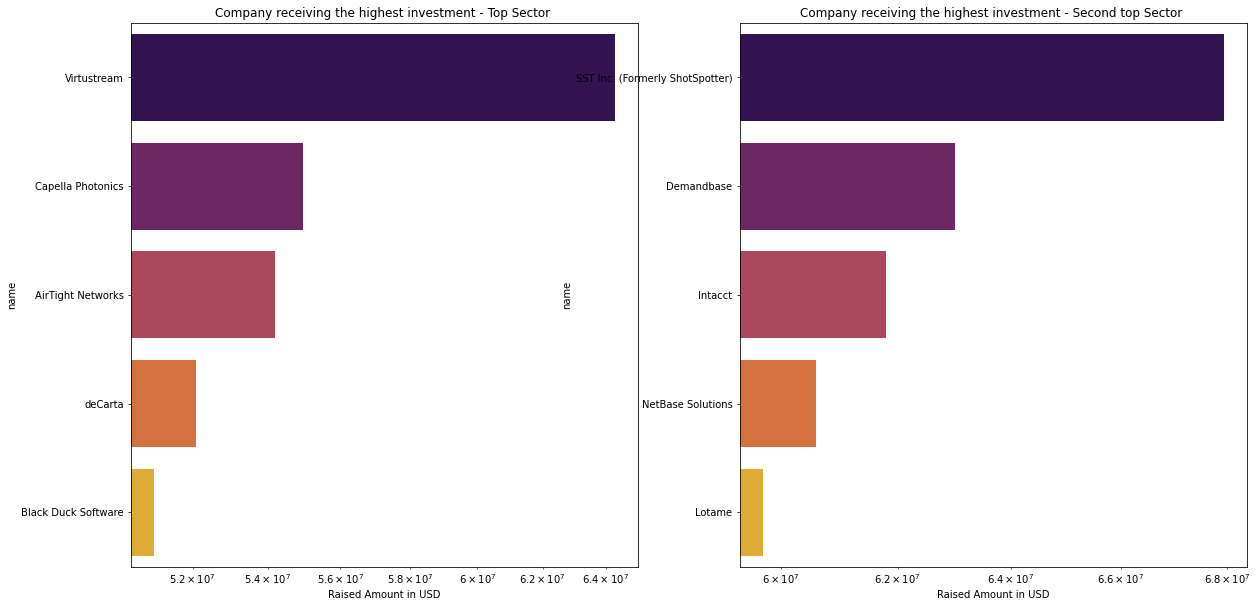

In [67]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x= D1_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D1_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Top Sector ")
plt.subplot(1, 2, 2)
sns.barplot(x= D1_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D1_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Second top Sector ")
plt.show()

### Sector Analysis for GBR

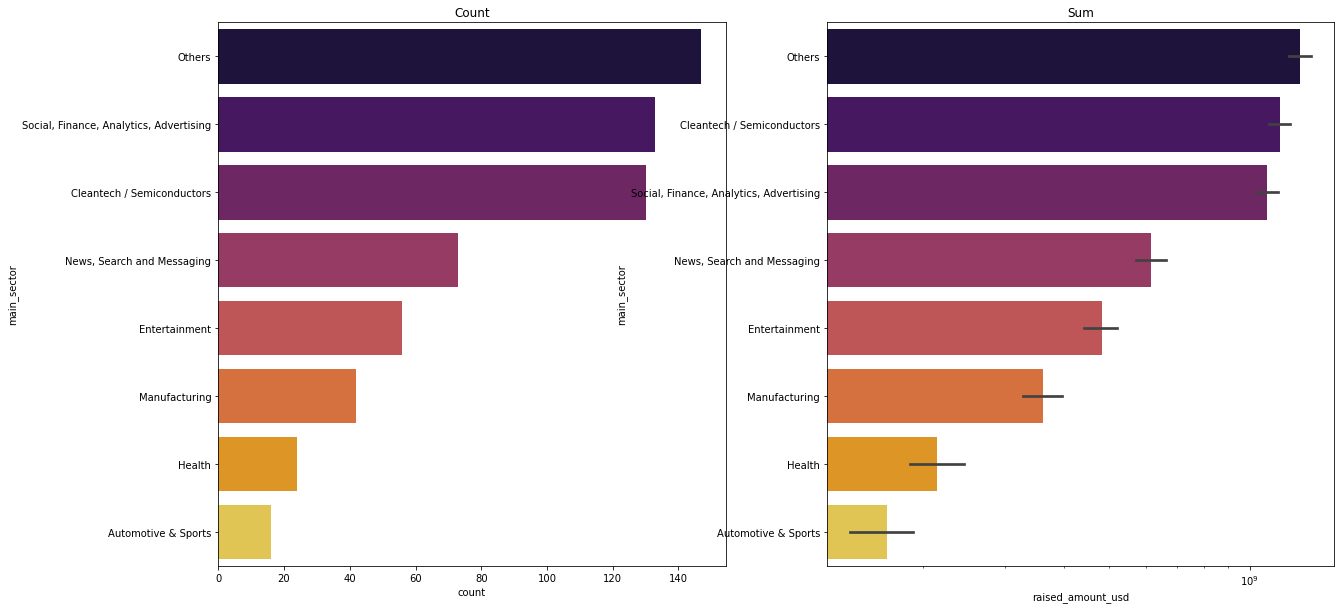

In [68]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", palette = "inferno",data=D2, order = D2['main_sector'].value_counts().index)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", palette = "inferno",data=D2, estimator=sum, order = D2_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).index)
plt.title("Sum")
plt.xscale('log')
plt.show()

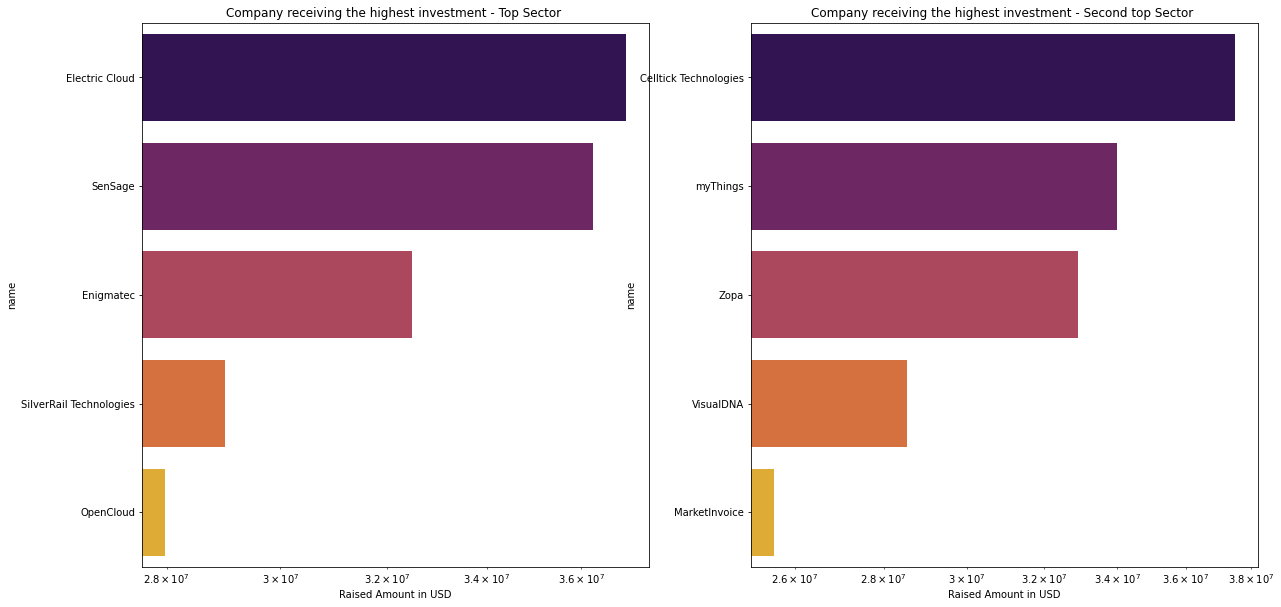

In [69]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x= D2_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D2_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Top Sector ")
plt.subplot(1, 2, 2)
sns.barplot(x= D2_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D2_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Second top Sector ")
plt.show()

### Sector Analysis for IND

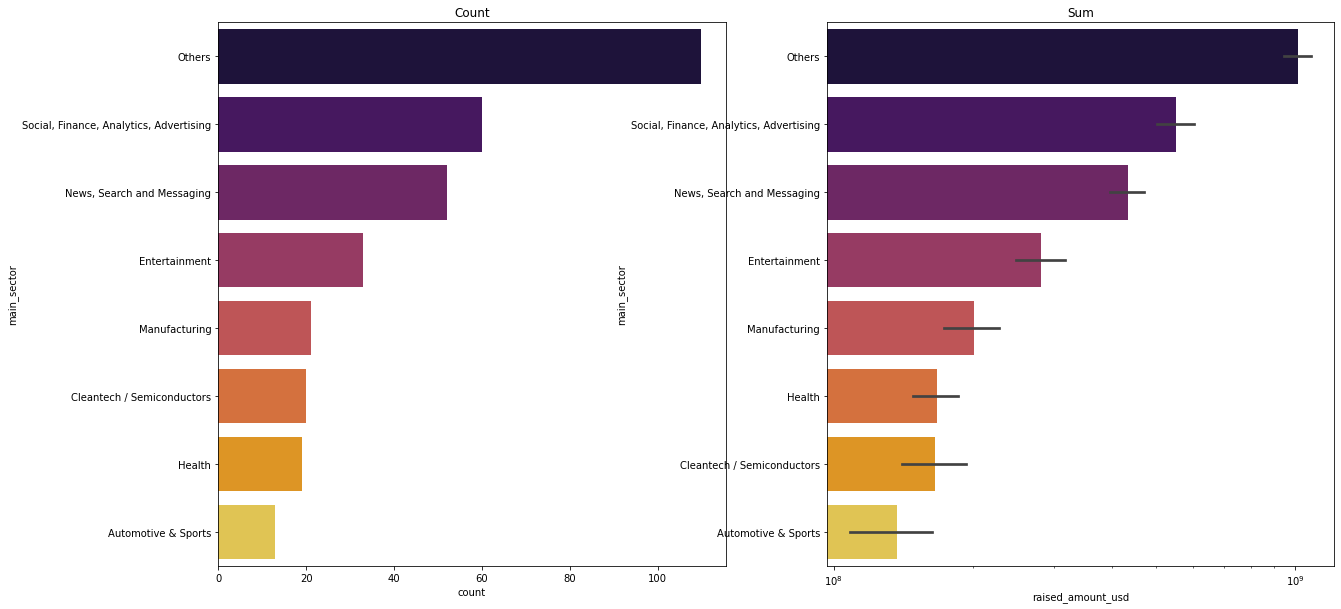

In [70]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", palette = "inferno",data=D3, order = D3['main_sector'].value_counts().index)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", palette = "inferno",data=D3, estimator=sum, order = D3_sec_grp['raised_amount_usd'].sum().sort_values(ascending=False).index)
plt.title("Sum")
plt.xscale('log')
plt.show()

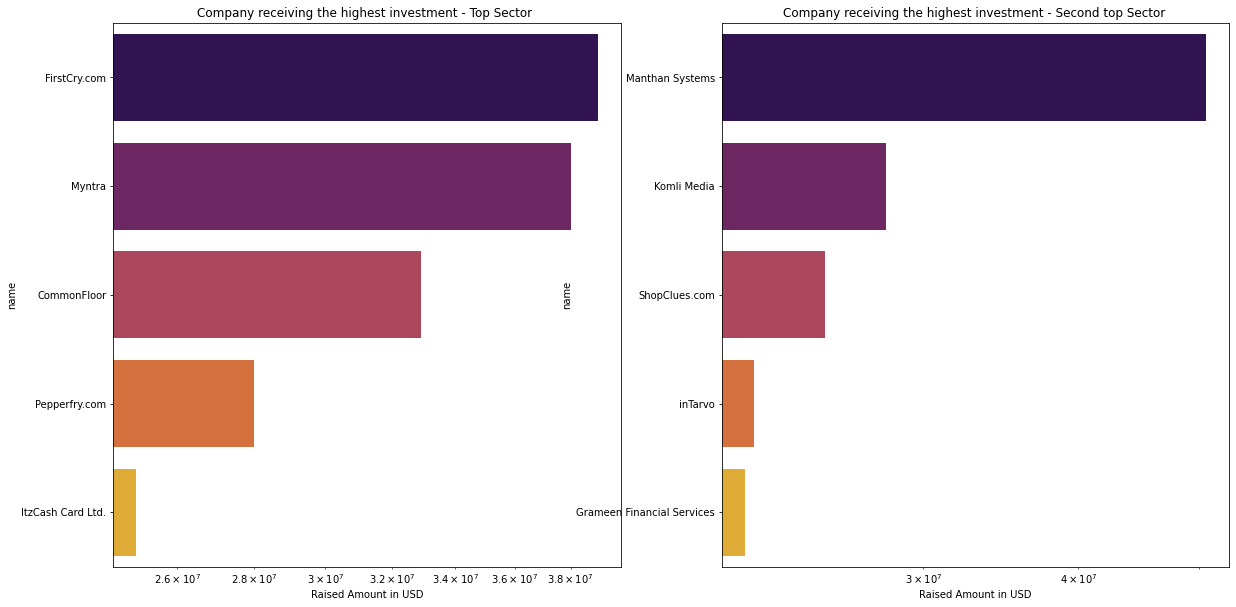

In [71]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.barplot(x= D3_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D3_cmpy_sect1_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Top Sector ")
plt.subplot(1, 2, 2)
sns.barplot(x= D3_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).values,y=D3_cmpy_sect2_grp.raised_amount_usd.sum().sort_values(ascending=False).head(5).index,palette = "inferno")
plt.xscale('log')
plt.xlabel('Raised Amount in USD')
plt.title("Company receiving the highest investment - Second top Sector ")
plt.show()

### Sector Analysis for Top 3 English Speaking Countries

In [72]:
D_USA_temp1 = D1_sec_grp['raised_amount_usd'].count().reset_index()
D_USA = D_USA_temp1.sort_values(by="raised_amount_usd", ascending=False).head(3)

D_GBR_temp1 = D2_sec_grp['raised_amount_usd'].count().reset_index()
D_GBR = D_GBR_temp1.sort_values(by="raised_amount_usd", ascending=False).head(3)

D_IND_temp1 = D3_sec_grp['raised_amount_usd'].count().reset_index()
D_IND = D_IND_temp1.sort_values(by="raised_amount_usd", ascending=False).head(3)

D_USA_GBR = pd.merge(D_USA,D_GBR,how='outer',on='main_sector')

D_USA_GBR_IND = pd.merge(D_USA_GBR,D_IND,how='outer',on='main_sector')

D_USA_GBR_IND = D_USA_GBR_IND.rename(columns={"raised_amount_usd_x": "USA", "raised_amount_usd_y": "GBR" ,"raised_amount_usd": "INR"})
D_USA_GBR_IND= D_USA_GBR_IND.set_index("main_sector")
D_USA_GBR_IND.fillna(0)

,USA,GBR,INR
main_sector,,,
Others,2950.0,147.0,110.0
"Social, Finance, Analytics, Advertising",2714.0,133.0,60.0
Cleantech / Semiconductors,2350.0,130.0,0.0
"News, Search and Messaging",0.0,0.0,52.0


<Figure size 720x720 with 0 Axes>

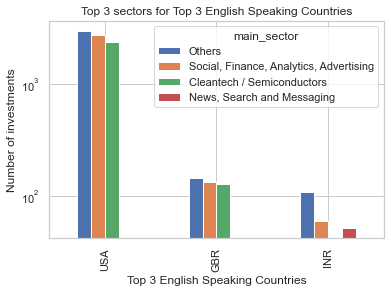

In [73]:
plt.figure(figsize=(10, 10))
sns.set_theme(style="whitegrid")
D_USA_GBR_IND.T.plot.bar(logy=True)
plt.title("Top 3 sectors for Top 3 English Speaking Countries")
plt.xlabel("Top 3 English Speaking Countries")
plt.ylabel("Number of investments")
plt.show()

In [74]:
D_USA_temp1 = D1_sec_grp['raised_amount_usd'].count().reset_index()
D_USA = D_USA_temp1.sort_values(by="raised_amount_usd", ascending=False)

D_GBR_temp1 = D2_sec_grp['raised_amount_usd'].count().reset_index()
D_GBR = D_GBR_temp1.sort_values(by="raised_amount_usd", ascending=False)

D_IND_temp1 = D3_sec_grp['raised_amount_usd'].count().reset_index()
D_IND = D_IND_temp1.sort_values(by="raised_amount_usd", ascending=False)

D_USA_GBR = pd.merge(D_USA,D_GBR,how='outer',on='main_sector')

D_USA_GBR_IND = pd.merge(D_USA_GBR,D_IND,how='outer',on='main_sector')

D_USA_GBR_IND = D_USA_GBR_IND.rename(columns={"raised_amount_usd_x": "USA", "raised_amount_usd_y": "GBR" ,"raised_amount_usd": "INR"})
D_USA_GBR_IND= D_USA_GBR_IND.set_index("main_sector")
D_USA_GBR_IND.fillna(0)

,USA,GBR,INR
main_sector,,,
Others,2950,147,110
"Social, Finance, Analytics, Advertising",2714,133,60
Cleantech / Semiconductors,2350,130,20
"News, Search and Messaging",1583,73,52
Health,909,24,19
Manufacturing,799,42,21
Entertainment,591,56,33
Automotive & Sports,167,16,13


In [75]:
D_USA_GBR_IND = D_USA_GBR_IND.reset_index()

<Figure size 720x1440 with 0 Axes>

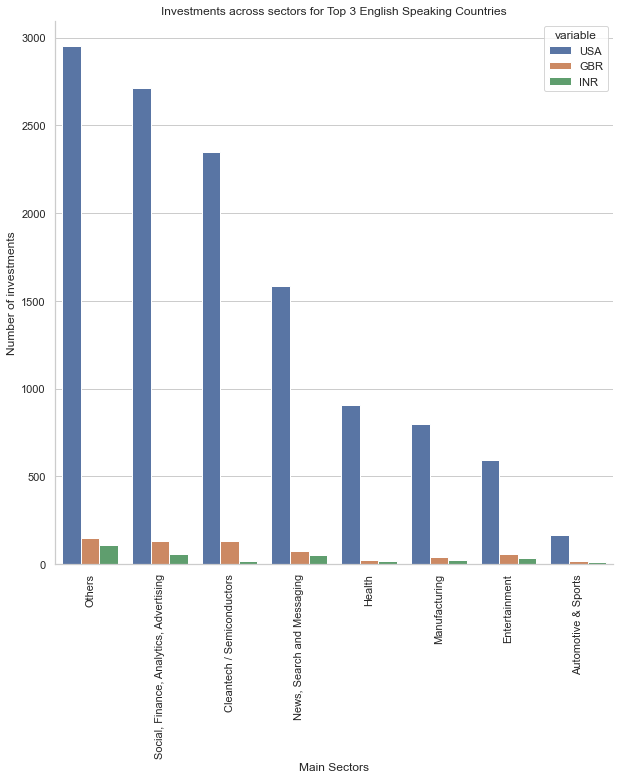

In [76]:
plt.figure(figsize=(10, 20))
#sns.set_theme(style="whitegrid")
#D_USA_GBR_IND.T.plot.bar()
fig, ax1 = plt.subplots(figsize=(10, 10))
tidy = D_USA_GBR_IND.melt(id_vars='main_sector').rename(columns=str)
sns.barplot(x='main_sector', y='value', hue='variable', data=tidy, ax=ax1)
sns.despine(fig)
plt.title("Investments across sectors for Top 3 English Speaking Countries")
plt.xlabel("Main Sectors")
plt.xticks(rotation=90)
plt.ylabel("Number of investments")
plt.show()